# Engenharia de Software para Ciência de Dados

### Projeto completo de Machine learning

Lucas Cordeiro Romão | 2220980

## 1. Definição e Especificação do problema

Nesse projeto, carregarei um dataset sobre informações de sono disponível neste [link do kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). Ele contém as seguintes informações (adaptado do site):

O conjunto de dados Sleep Health and Lifestyle possui 374 linhas e 13 colunas, abrangendo variáveis relacionadas ao sono, hábitos diários e distúrbios do sono. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, atividade física, estresse, IMC, pressão arterial, frequência cardíaca e passos diários. Principais recursos do conjunto de dados: métricas abrangentes de sono, fatores de estilo de vida, saúde cardiovascular e análise de distúrbios do sono, como insônia e apneia do sono.

Colunas do conjunto de dados:

* Person ID: Um identificador para cada indivíduo.
* Gender: O gênero da pessoa (Masculino/Feminino).
* Age: A idade da pessoa em anos.
* Occupation: A ocupação ou profissão da pessoa.
* Sleep duration (horas): O número de horas que a pessoa dorme por dia.
* Quality of sleep (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.
* Physical Activity Level (minutos/dia): O número de minutos que a pessoa se dedica à atividade física diariamente.
* Stress Level (escala: 1-10): Uma classificação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* BMI Category: A categoria de IMC da pessoa (por exemplo, abaixo do peso, normal, acima do peso).
* Blood Pressure (sistólica/diastólica): A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* Heart Rate (bpm): A frequência cardíaca em repouso da pessoa em batimentos por minuto.
* Daily Steps: O número de passos que a pessoa dá por dia.
* Sleep Disorder: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do sono).
    + None: O indivíduo não apresenta nenhum distúrbio do sono específico.
    + Insomnia: O indivíduo tem dificuldade em adormecer ou em manter o sono, resultando em sono inadequado ou de má qualidade.
    + Sleep Apnea: O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais para a saúde.

O objetivo será **predizer a qualidade do sono** baseando-nos nas informações disponíveis. 

### 1.1. Especificação do problema

User history:
COMO um usuário do sistema QUERO entender mais a fundo meu sono PARA saber se tenho alguém distúrbio de sono

Critérios de Aceitação:
DADO QUE Entro com minhas informações de saúde e proffisionais QUANDO aciono o classificador ENTÃO recebo o diagnóstico de minha condição de sono

A proposta desta funcionalidade é treinar um modelo de ML a partir dos dados de entrada para que possa ser utilizado em análsies futuras e auxiliar o profissional na análise do sono do paciente.

### 1.2. Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## 2. Carga do Dataset

In [6]:
sleep_df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')

## 3. Análise exploratória dos dados

In [7]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
sleep_df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
sleep_df.info()
# A Coluna alvo para predição será a Sleep disorder
# Aqui temos algumas colunas do tipo object, que serão convertidas para numéricas posteriormente.
# Essas colunas são: Gender, Occupation, Blood PRessure, BMI Category e Sleep Disorder.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
# Verificando se há valores nulos
sleep_df.isnull().sum()

#Não há valores nulos

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
sleep_df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [12]:
sleep_df.duplicated().any() 
# Não há valores duplicados

False

In [13]:
# Verificando possíveis anomalias.
round(sleep_df.describe(), 2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


In [14]:
round(sleep_df.describe(include=object), 2)

# Aparentemente não há anomalias nos dados.

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


Sleep Disorder
Insomnia        77
None           219
Sleep Apnea     78
dtype: int64


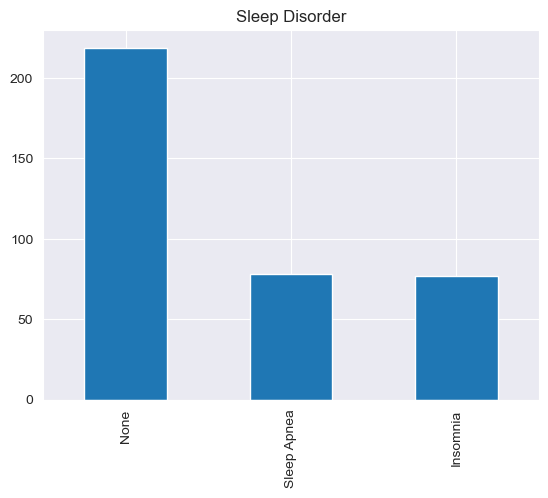

In [15]:
sleep_df['Sleep Disorder'].value_counts().plot(kind='bar', title='Sleep Disorder')
print(sleep_df.groupby('Sleep Disorder').size())

## 4. Manipulação e limpeza dos dados

Nesta seção, farei as manipulações necessárias dos dados. para, então, teralgumas visualizações das distribuições.

In [16]:
# Verificando os nomes presentes em BMI
sleep_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [17]:
# Vou trocar os valores de 'Normal Weight' para 'Normal'
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace('Normal Weight', 'Normal')

# Verificando os nomes presentes em BMI
sleep_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [18]:
# Tornando as colunas [Gender, Occupation e BMI Category] em colunas categóricas

sleep_df['Gender'] = sleep_df['Gender'].astype('category')
sleep_df['Occupation'] = sleep_df['Occupation'].astype('category')
sleep_df['BMI Category'] = sleep_df['BMI Category'].astype('category')

# Conferindo
sleep_df.info()

# Fiz isso para fazer os plots na sessão seguinte.
# A intenção depois é transformar as colunas categóricas em numéricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    object  
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    object  
dtypes: category(3), float64(1), int64(7), object(2)
memory usage: 31.

## 5. Visualizações unimodais e multimodais

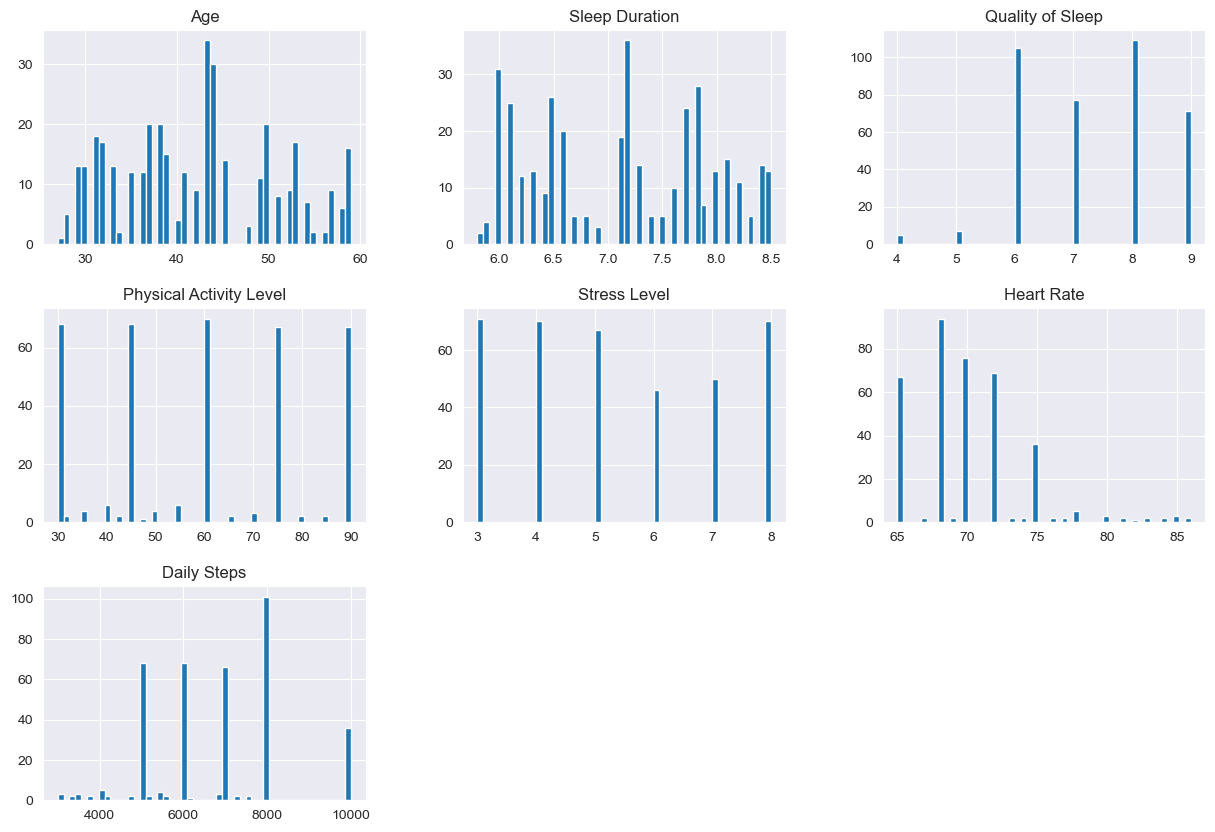

In [19]:
# Density Plot das variáveis numéricas
sleep_df.drop(columns="Person ID").hist(bins=50, figsize=(15,10), sharex=False, sharey=False);
plt.show()

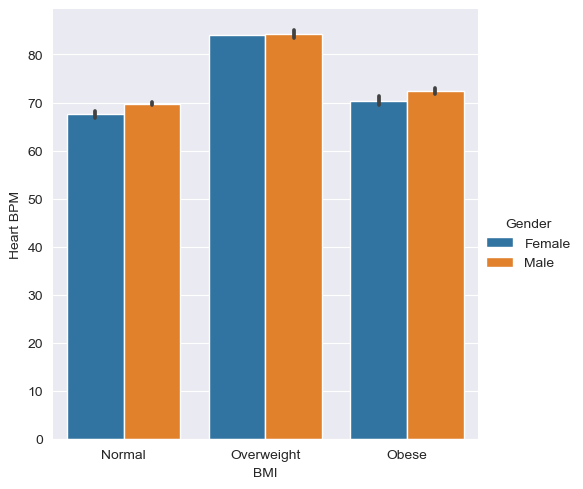

In [20]:
bmi_plot = sns.catplot(data=sleep_df, x="BMI Category", y="Heart Rate", kind="bar",hue='Gender')
bmi_plot.set_axis_labels("BMI", "Heart BPM")
bmi_plot.set_xticklabels(["Normal", "Overweight", "Obese"])
bmi_plot.set_titles("Heatrate based on the BMI category")
bmi_plot.despine(left=True)
plt.show()

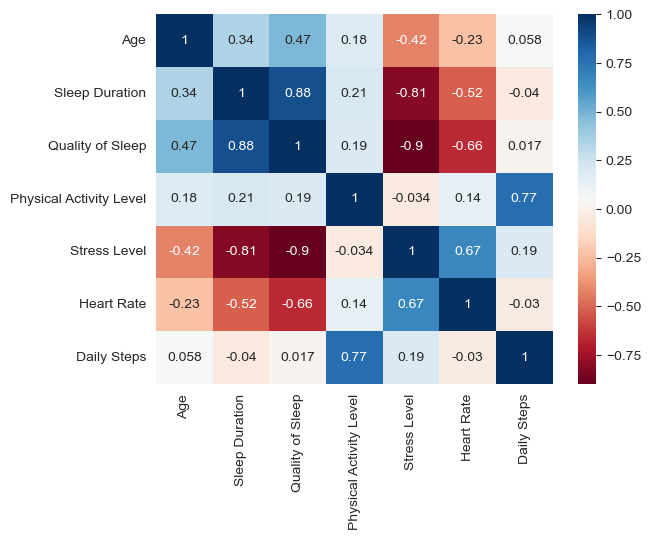

In [21]:
# Construindo uma matriz de correlação
correlation_plot = sns.heatmap(sleep_df.drop(columns=['Person ID']).corr(), annot=True, cmap='RdBu');

<Figure size 1500x800 with 0 Axes>

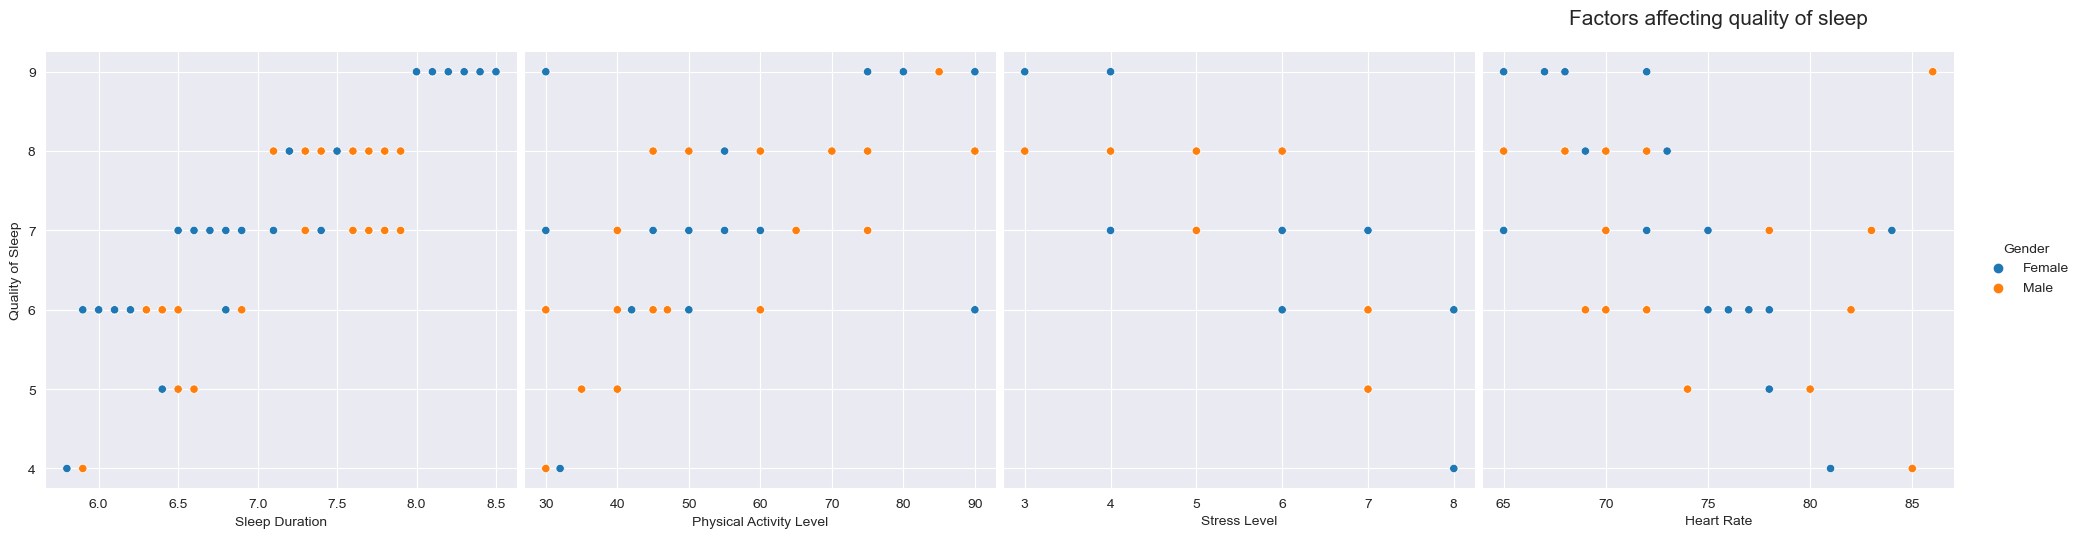

In [22]:
fig = plt.figure(figsize= (15,8))

sns.pairplot(data = sleep_df, x_vars = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate'], 
             y_vars = ['Quality of Sleep'], hue = 'Gender', height = 5)
plt.title('Factors affecting quality of sleep', pad = 20, fontsize = 15)
plt.axis('tight')
plt.show()

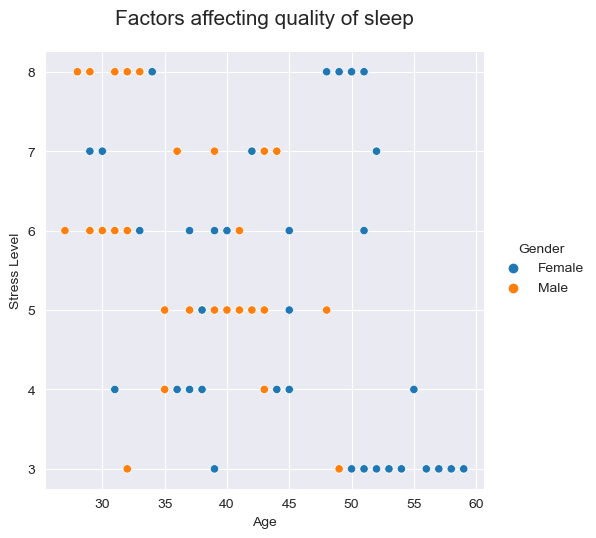

In [23]:
sns.pairplot(data = sleep_df, x_vars = ['Age'], y_vars = ['Stress Level'], hue = 'Gender', height = 5)
plt.title('Factors affecting quality of sleep', pad = 20, fontsize = 15)
plt.axis('tight')
plt.show()

À medida que a pessoa vai ficando mais velha, seu nível de estresse vai diminuindo

Podemos ver a corelação positiva entre o tempo de sono e a qualidade e a correlação negativa entre o nível de estresse e a qualidade do sono.

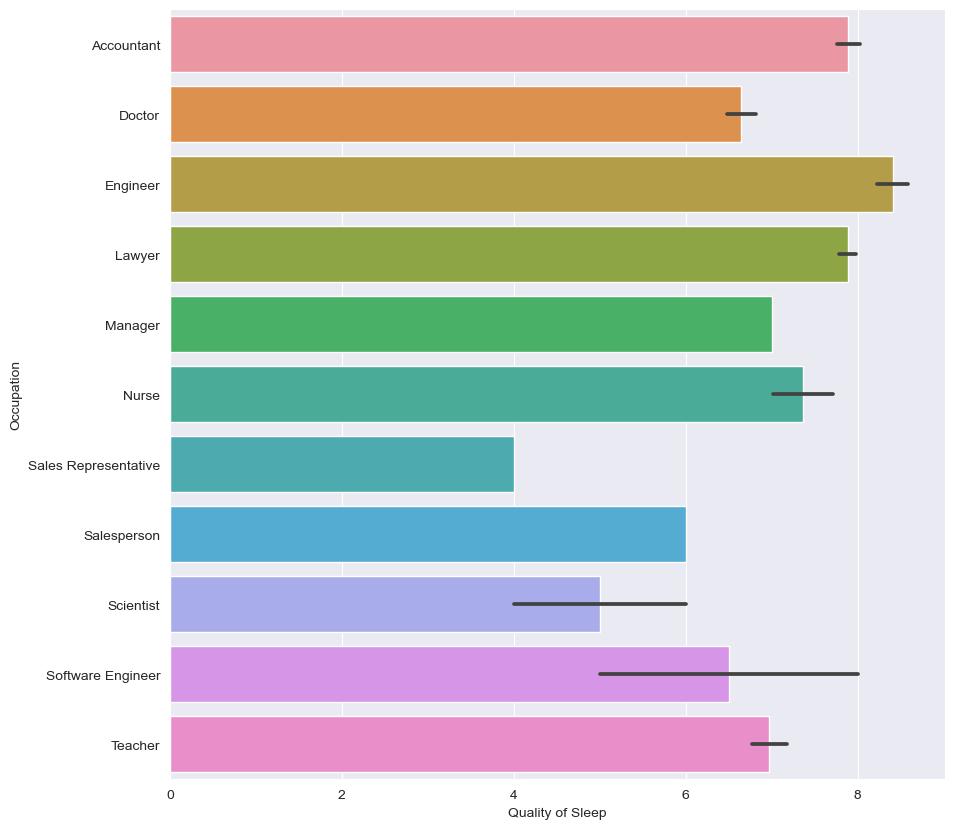

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
occupation_plot = sns.barplot(sleep_df, x="Quality of Sleep", y="Occupation")
# Set x-axis labels rotation
occupation_plot.set_xticklabels(occupation_plot.get_xticklabels())
plt.show()

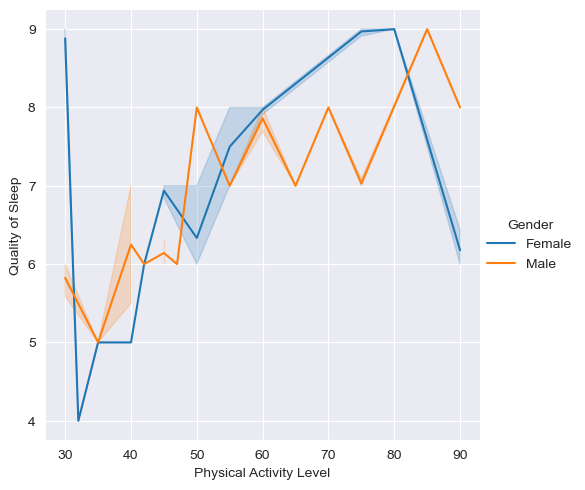

In [25]:
# Relação entre qualidade de sono e nível de atividade física
sns.relplot(data=sleep_df, x='Physical Activity Level', y='Quality of Sleep',
            kind='line', hue='Gender')

## 5. Preparação dos dados para o treinamento

### 5.1. Preparação dos dados para repartição   

In [26]:
# Trasnformando as colunas categóricas em numéricas
# Rodar somente uma vez
sleep_df['BMI Category'] = sleep_df['BMI Category'].cat.codes   
sleep_df['Gender'] = sleep_df['Gender'].cat.codes   
sleep_df['Occupation'] = sleep_df['Occupation'].cat.codes 
  
sleep_df[['BMI Category', 'Occupation', 'Gender']] .head()

,BMI Category,Occupation,Gender
0,2,9,1
1,0,1,1
2,0,1,1
3,1,6,1
4,1,6,1


In [27]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,None
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,None
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,None
3,4,1,28,6,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea
4,5,1,28,6,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea


In [28]:
# Agora tratando a coluna Blood Pressure
# Dividindo a coluna em duas: Systolic e Diastolic
sleep_df[['Systolic', 'Diastolic']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
# O expand=True cria um dataframe com as duas colunas sem precisar fazer isso em duas etapas.
sleep_df[['Systolic', 'Diastolic']] = sleep_df[['Systolic', 'Diastolic']].astype(int)

sleep_df.drop(columns=['Blood Pressure'], inplace=True)

sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,1,27,9,6.1,6,42,6,2,77,4200,None,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,None,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,None,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90


In [29]:
# Agora só falta a coluna Sleep Disorder
print(sleep_df['Sleep Disorder'].unique(), sleep_df['Sleep Disorder'].dtype)

['None' 'Sleep Apnea' 'Insomnia'] object


In [30]:
# Vou transformar object em int (object -> category -> int)
sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].astype('category')
code_to_disorder = dict(enumerate(sleep_df['Sleep Disorder'].cat.categories))
sleep_df['Sleep Disorder Code'] = sleep_df['Sleep Disorder'].cat.codes
sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder Code'].map(code_to_disorder)

sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Sleep Disorder Code
0,1,1,27,9,6.1,6,42,6,2,77,4200,None,126,83,1
1,2,1,28,1,6.2,6,60,8,0,75,10000,None,125,80,1
2,3,1,28,1,6.2,6,60,8,0,75,10000,None,125,80,1
3,4,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90,2
4,5,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90,2


In [31]:
code_to_disorder
# Esse é o mapeamento de códigos para distúrbios de sono.

{0: 'Insomnia', 1: 'None', 2: 'Sleep Apnea'}

In [32]:
sleep_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Sleep Disorder Code'],
      dtype='object')

Agora o dataset já está pronto para ser usado no modelo de ML.
As colunas já são todas numéricas e as classes já estão devidamente organizadas e mapeadas.

### 5.2. Dividindo os dados em teste e treino

In [33]:
test_size = 0.17 
# Foi escolhido 17% para teste pois a divisão de 80/20 não era um número inteiro
# O resultado foi 80% para treino e 20% para teste com esse test_size
seed = 42

# Definição das variáveis X e y
X = sleep_df.drop(columns=['Sleep Disorder', 'Sleep Disorder Code', 'Person ID'])
y = sleep_df['Sleep Disorder Code']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=seed,
                                                    stratify=y,
                                                    shuffle=True)

# Verificando o shape dos dados
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(len(X_test)/ len(X_train)) # Verificando se a divisão resultou em 80/20

X_train shape: (310, 12)
y_train shape: (310,)
X_test shape: (64, 12)
y_test shape: (64,)
0.2064516129032258


A divisão resultou em uma proporção 80/20 com o test_size de 17%

## 6. Modelos de classificação

### Preparando modelos e auxiliares

In [34]:
# Organizando parâmetros de avaliaçao.
# Definindo a seed para reprodução dos resultados.
# Definindo o número de partições para o kfold.

scoring_parameters = ['accuracy', 'f1_macro']
partitions = 10
kfold = StratifiedKFold(n_splits=partitions, random_state=seed, shuffle=True)

np.random.seed(42) # definindo uma semente global
round_factor = 2

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
robust_scaler = ('RobustScaler', RobustScaler())

In [35]:
# Instanciando os modelos.

log_res     = ('LR', LogisticRegression(max_iter=10000)) # To converge faster
dec_tree    = ('DT', DecisionTreeClassifier())
rand_forest = ('RF', RandomForestClassifier())
xtra_tree   = ('ET', ExtraTreesClassifier())
svm         = ('SVM', svm.SVC())
knn         = ('KNN', KNeighborsClassifier())
nb          = ('NB', GaussianNB())
mlp         = ('MLP', MLPClassifier())

### Funções auxiliares

In [36]:
# Função para rodar os modelos
def run_models(models, X = X_train, y = y_train, scoring_parameters = scoring_parameters, partitions = kfold, round_factor = round_factor):
    names = []
    results = []
    for score in scoring_parameters:
        print('Metric: %s' % score)
        for name, model in models:
            cv_results = cross_val_score(model, X, y, cv=partitions, scoring=score)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %.{0}f \u00B1 %.{0}f".format(round_factor) % (name, cv_results.mean()*100, cv_results.std()*100)
            print(msg)
        print('\n')
    return names, results

In [37]:
# Tornando a célula de código acima em uma função para reutilização
def plot_models_performance(results, names, title = "Models' Performance"):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle(title)
    results_spliter = len(results)//2 # Spliting the results in two lists to get Accuracy and F1-score.
    rotation_angle = 90 # Rotation angle for the xticklabels

    # First subplot - Accuracy
    ax1.boxplot(results[:results_spliter])
    ax1.set_xticklabels(names[:results_spliter], rotation=rotation_angle)
    ax1.set_title("Accuracy")

    # Second subplot - F1-score
    ax2.boxplot(results[results_spliter:])
    ax2.set_xticklabels(names[results_spliter:], rotation=rotation_angle)
    ax2.set_title("F1-score")

    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)

    # Display the plot
    plt.show()

In [38]:
def perform_grid_search(pipelines, param_grid, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, scoring_parameters = scoring_parameters, partitions = kfold):

    for score in scoring_parameters:
        print('Metric: %s' % score)
        # Perform grid search with each pipeline
        for name, model in pipelines:
            # Create the grid search object
            grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=partitions)

            # Fit the grid search to the training data
            grid.fit(X_train, y_train)

            # Print the best score and best parameters
            print(f"{name} - Best score: {grid.best_score_:.4f}")
            print("Best parameters:")
            for param, value in grid.best_params_.items():
                print(f"{param}: {value}")
            print()

            # Evaluate the best model on the test data
            best_model = grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            print(f"Test accuracy using the best model: {test_accuracy:.4f}")
            print("-----------------------------------")
            return grid.best_params_

### 6.1. Modelos de linha base

In [39]:
# Rodando modelos de linha base
base_models = [log_res, dec_tree, rand_forest, xtra_tree, svm, knn, nb, mlp]
base_names, base_results = run_models(models= base_models)

Metric: accuracy
LR: 88.06 ± 4.57
DT: 87.10 ± 5.20
RF: 89.03 ± 4.83
ET: 88.06 ± 5.41
SVM: 64.84 ± 6.03
KNN: 85.81 ± 5.44
NB: 87.42 ± 4.43
MLP: 42.26 ± 16.91


Metric: f1_macro
LR: 84.93 ± 6.72
DT: 84.30 ± 8.83
RF: 86.07 ± 7.89
ET: 85.59 ± 7.59
SVM: 43.07 ± 9.35
KNN: 82.83 ± 6.21
NB: 84.20 ± 6.47
MLP: 28.76 ± 13.38




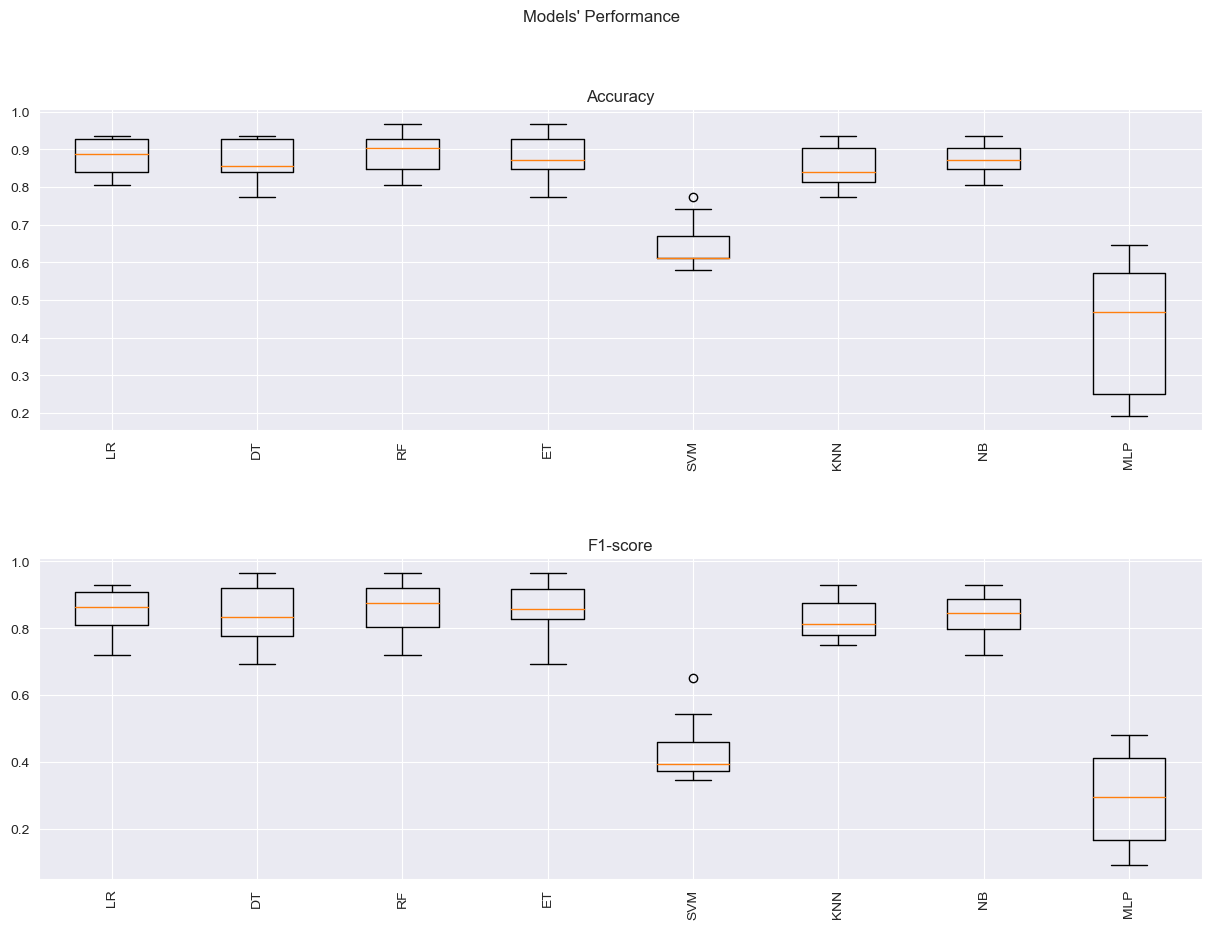

In [40]:
plot_models_performance(base_results, base_names)

### 6.2. Rescalando os modelos

Nesta seção irei reescalar os modelos utilizando Padronização e Normalização.
A Regressão Logística teve de requirir um número maior de iterações para convergir ou reescalar a fim de convergir.

In [41]:
# Aqui iremos armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []

# Dataset sem transformação
pipelines.append(('LR', Pipeline([log_res])))
pipelines.append(('DT', Pipeline([dec_tree])))
pipelines.append(('RF', Pipeline([rand_forest])))
pipelines.append(('ET', Pipeline([xtra_tree])))
pipelines.append(('SVM', Pipeline([svm])))
pipelines.append(('KNN', Pipeline([knn])))
pipelines.append(('NB', Pipeline([nb])))
pipelines.append(('MLP', Pipeline([mlp])))

# Building the pipelines with StandardScaler
pipelines.append(('LR-std', Pipeline([standard_scaler, log_res])))
pipelines.append(('DT-std', Pipeline([standard_scaler, dec_tree])))
pipelines.append(('RF-std', Pipeline([standard_scaler, rand_forest])))
pipelines.append(('ET-std', Pipeline([standard_scaler, xtra_tree])))
pipelines.append(('SVM-std', Pipeline([standard_scaler, svm])))
pipelines.append(('KNN-std', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-std', Pipeline([standard_scaler, nb])))
pipelines.append(('MLP-std', Pipeline([standard_scaler, mlp])))

# The same, but for the MinMaxScaler
pipelines.append(('LR-minmax', Pipeline([min_max_scaler, log_res])))
pipelines.append(('DT-minmax', Pipeline([min_max_scaler, dec_tree])))
pipelines.append(('RF-minmax', Pipeline([min_max_scaler, rand_forest])))
pipelines.append(('ET-minmax', Pipeline([min_max_scaler, xtra_tree])))
pipelines.append(('SVM-minmax', Pipeline([min_max_scaler, svm])))
pipelines.append(('KNN-minmax', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-minmax', Pipeline([min_max_scaler, nb])))
pipelines.append(('MLP-minmax', Pipeline([min_max_scaler, mlp])))

# The same, but for the RobustScaler

pipelines.append(('LR-robust', Pipeline([robust_scaler, log_res])))
pipelines.append(('DT-robust', Pipeline([robust_scaler, dec_tree])))
pipelines.append(('RF-robust', Pipeline([robust_scaler, rand_forest])))
pipelines.append(('ET-robust', Pipeline([robust_scaler, xtra_tree])))
pipelines.append(('SVM-robust', Pipeline([robust_scaler, svm])))
pipelines.append(('KNN-robust', Pipeline([robust_scaler, knn])))
pipelines.append(('NB-robust', Pipeline([robust_scaler, nb])))
pipelines.append(('MLP-robust', Pipeline([robust_scaler, mlp])))

transformations_names, transformations_results = run_models(models=pipelines)

Metric: accuracy
LR: 88.06 ± 4.57
DT: 87.42 ± 6.36
RF: 90.00 ± 4.88
ET: 88.71 ± 5.63
SVM: 64.84 ± 6.03
KNN: 85.81 ± 5.44
NB: 87.42 ± 4.43
MLP: 50.32 ± 14.44
LR-std: 88.39 ± 5.98
DT-std: 87.42 ± 6.36
RF-std: 89.03 ± 4.83
ET-std: 87.74 ± 5.16
SVM-std: 90.32 ± 4.08
KNN-std: 87.74 ± 4.74
NB-std: 87.42 ± 4.43
MLP-std: 90.32 ± 5.20
LR-minmax: 88.39 ± 4.13
DT-minmax: 87.10 ± 5.95
RF-minmax: 89.68 ± 5.16
ET-minmax: 88.39 ± 5.24
SVM-minmax: 87.42 ± 5.09
KNN-minmax: 85.48 ± 4.39
NB-minmax: 87.42 ± 4.43
MLP-minmax: 88.06 ± 4.57
LR-robust: 88.06 ± 5.96
DT-robust: 87.74 ± 6.09
RF-robust: 90.00 ± 4.88
ET-robust: 87.42 ± 5.67
SVM-robust: 90.00 ± 4.43
KNN-robust: 86.77 ± 6.36
NB-robust: 87.42 ± 4.43
MLP-robust: 90.65 ± 5.09


Metric: f1_macro
LR: 84.93 ± 6.72
DT: 84.90 ± 7.57
RF: 87.02 ± 7.48
ET: 85.46 ± 8.17
SVM: 43.07 ± 9.35
KNN: 82.83 ± 6.21
NB: 84.20 ± 6.47
MLP: 25.02 ± 14.96
LR-std: 85.29 ± 8.44
DT-std: 83.17 ± 8.54
RF-std: 85.72 ± 7.51
ET-std: 85.46 ± 8.17
SVM-std: 87.61 ± 6.20
KNN-std: 84.82 ± 

O Regressão Logística convergiu mais rapidamente com os dados padronizados. MAs ainda há modelos que não convergiram tão bem. Para isso, é só durante o Grid sEarch. Vou deixar esse print assim para que fique explicíto que o modelo não convergiu e há necessidade de aumentar o número de iterações.

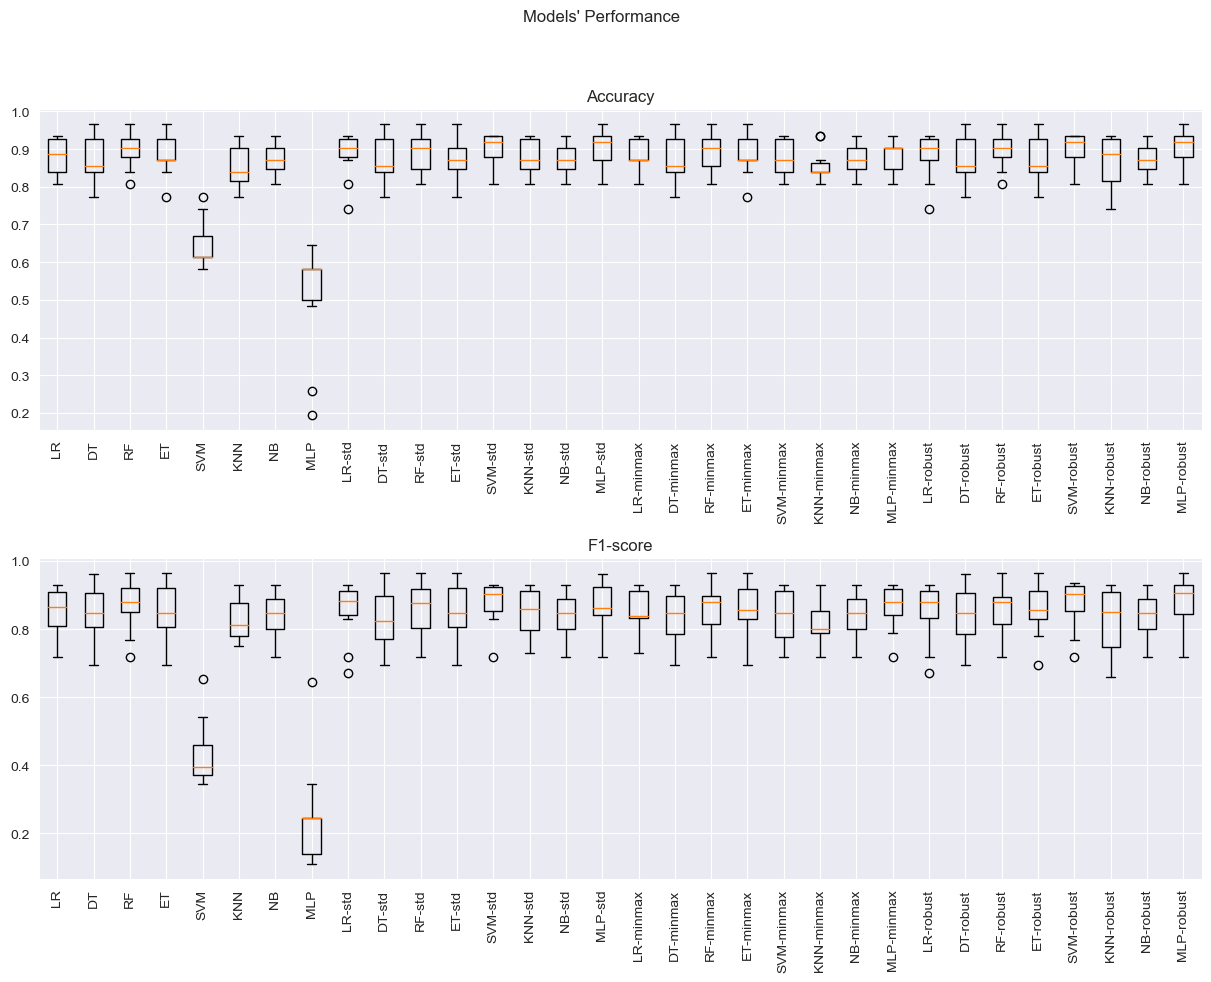

In [42]:
# Comparação dos modelos com os dados transformados
plot_models_performance(transformations_results, transformations_names)

## 7. Grid search

Nesta seção farei o grid search a fim de verificar quais os melhores parâmetros para cada modelo

In [ ]:
# Tuning da Regressão Logística
log_res_pipelines = []

log_res_pipelines.append(('LR', Pipeline([log_res])))
log_res_pipelines.append(('LR-std', Pipeline([standard_scaler, log_res])))
log_res_pipelines.append(('LR-minmax', Pipeline([min_max_scaler, log_res])))
log_res_pipelines.append(('LR-robust', Pipeline([robust_scaler, log_res])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
log_res_param_grid = {
    'LR__penalty': ['l1', 'l2'],
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'LR__solver': ['liblinear', 'saga'],
    'LR__max_iter': [100, 1000, 2500, 5000, 10000, 20000]
}

log_res_best_parameters = perform_grid_search(log_res_pipelines, log_res_param_grid)

In [43]:
# Tuning da Árvore de Decisão
dec_tree_pipelines = []

dec_tree_pipelines.append(('DT', Pipeline([dec_tree])))
dec_tree_pipelines.append(('DT-std', Pipeline([standard_scaler, dec_tree])))
dec_tree_pipelines.append(('DT-minmax', Pipeline([min_max_scaler, dec_tree])))
dec_tree_pipelines.append(('DT-robust', Pipeline([robust_scaler, dec_tree])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
dec_tree_param_grid = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__splitter': ['best', 'random'],
    'DT__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 4],
    'DT__max_features': ['auto', 'sqrt', 'log2', None]
}

dec_tree_best_parameters = perform_grid_search(dec_tree_pipelines, dec_tree_param_grid)

Metric: accuracy
DT - Best score: 0.9032
Best parameters:
DT__criterion: entropy
DT__max_depth: 4
DT__max_features: sqrt
DT__min_samples_leaf: 1
DT__min_samples_split: 10
DT__splitter: best

Test accuracy using the best model: 0.9531
-----------------------------------


In [ ]:
# Tuning do SVM
svm_pipelines = []

svm_pipelines.append(('SVM', Pipeline([svm])))
svm_pipelines.append(('SVM-std', Pipeline([standard_scaler, svm])))
svm_pipelines.append(('SVM-minmax', Pipeline([min_max_scaler, svm])))
svm_pipelines.append(('SVM-robust', Pipeline([robust_scaler, svm])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
svm_param_grid = {
    'SVM__C': [0.1, 1, 10, 100, 1000],
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'SVM__kernel': ['rbf', 'poly', 'sigmoid']
}

perform_grid_search(svm_pipelines, svm_param_grid)

In [ ]:
# Tuning do KNN
knn_pipelines = []

knn_pipelines.append(('KNN', Pipeline([knn])))
knn_pipelines.append(('KNN-std', Pipeline([standard_scaler, knn])))
knn_pipelines.append(('KNN-minmax', Pipeline([min_max_scaler, knn])))
knn_pipelines.append(('KNN-robust', Pipeline([robust_scaler, knn])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
knn_param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

knn_best_parameters = perform_grid_search(knn_pipelines, knn_param_grid)

In [ ]:
# Tuning do Naive Bayes
nb_pipelines = []

nb_pipelines.append(('NB', Pipeline([nb])))
nb_pipelines.append(('NB-std', Pipeline([standard_scaler, nb])))
nb_pipelines.append(('NB-minmax', Pipeline([min_max_scaler, nb])))
nb_pipelines.append(('NB-robust', Pipeline([robust_scaler, nb])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
nb_param_grid = {
    'NB__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05],
}

nb_best_parameters = perform_grid_search(nb_pipelines, nb_param_grid)

In [ ]:
# Tuning da Floresta Aleatória
rand_forest_pipelines = []

rand_forest_pipelines.append(('RF', Pipeline([rand_forest])))
rand_forest_pipelines.append(('RF-std', Pipeline([standard_scaler, rand_forest])))
rand_forest_pipelines.append(('RF-minmax', Pipeline([min_max_scaler, rand_forest])))
rand_forest_pipelines.append(('RF-robust', Pipeline([robust_scaler, rand_forest])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
rand_forest_param_grid = {
    'RF__n_estimators': [100, 200, 300, 400, 500],
    'RF__criterion': ['gini', 'entropy'],
    'RF__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__max_features': ['auto', 'sqrt', 'log2', None]
}

rand_forest_best_parameters = perform_grid_search(rand_forest_pipelines, rand_forest_param_grid)

In [ ]:
# Tuning da Extra Trees
xtra_tree_pipelines = []

xtra_tree_pipelines.append(('ET', Pipeline([xtra_tree])))
xtra_tree_pipelines.append(('ET-std', Pipeline([standard_scaler, xtra_tree])))
xtra_tree_pipelines.append(('ET-minmax', Pipeline([min_max_scaler, xtra_tree])))
xtra_tree_pipelines.append(('ET-robust', Pipeline([robust_scaler, xtra_tree])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
xtra_tree_param_grid = {
    'ET__n_estimators': [100, 200, 300, 400, 500],
    'ET__criterion': ['gini', 'entropy'],
    'ET__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'ET__min_samples_split': [2, 5, 10],
    'ET__min_samples_leaf': [1, 2, 4],
    'ET__max_features': ['auto', 'sqrt', 'log2', None]
}

xtra_tree_best_parameters = perform_grid_search(xtra_tree_pipelines, xtra_tree_param_grid)

Não ffoi possível fazer o tuning do MLP.

In [45]:
# finalização do modelo

# Preparação do modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='best')
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.90625
[[12  0  1]
 [ 3 35  0]
 [ 2  0 11]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.92      0.96        38
           2       0.92      0.85      0.88        13

    accuracy                           0.91        64
   macro avg       0.87      0.90      0.88        64
weighted avg       0.92      0.91      0.91        64



O DEcision Tree foi o modelo que melhor performou levando em conta o tempo de processamento. Infelizmente nõa consegui rodar o grid para os outros modelos pois demoraram muito.

## 8. Implantando o modelo


Como este é um trabalho acadêmico, não teria a necessidade de implantar o modelo em um sistema SaaS. Porém, para fins de aprendizado, vamos implantar o modelo em um servidor Flask rodando localmente.
O modelo seria componente do backend onde o usuário poderia fazer uma requisição para o modelo e receber a resposta.
